In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from catboost import CatBoostRegressor

In [9]:
# Load dataset
df = pd.read_csv("selected_features_dataset.csv")

# Drop rows with missing target
df = df.dropna(subset=['segment_actual_time'])

# Encode categorical features
label_cols = ['source_city', 'destination_city']
df[label_cols] = df[label_cols].apply(LabelEncoder().fit_transform)

In [10]:
# Split features and target
X = df.drop(columns=['segment_actual_time', 'data'])
y = df['segment_actual_time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost Model
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    verbose=0,
    random_seed=42
)

In [11]:
# Fit model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Predict
y_pred = cat_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manual RMSE
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9254
RMSE: 0.2433
MAE: 0.0720


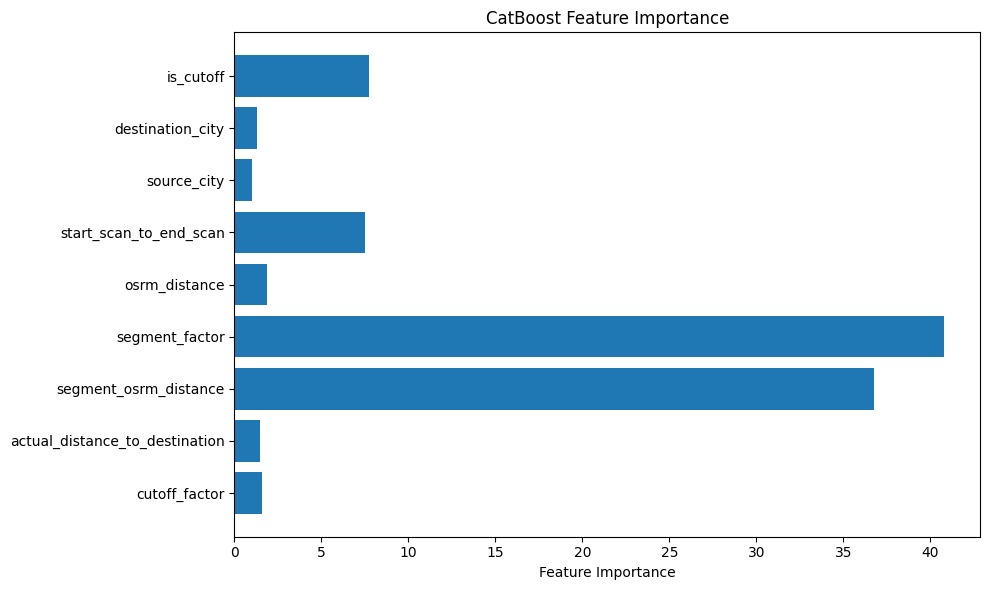

In [12]:
# Feature importance plot
feature_importance = cat_model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.savefig("catboost_feature_importance.png")
plt.show()

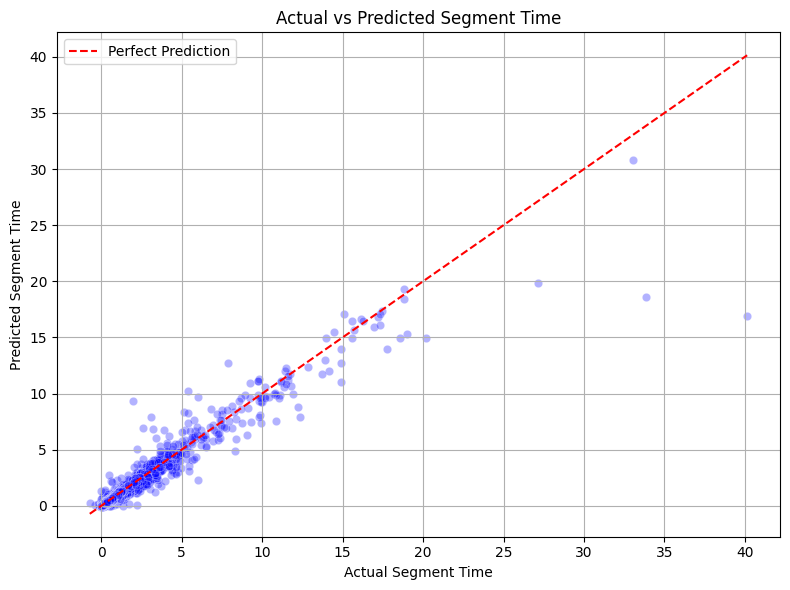

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Prediction")
plt.xlabel("Actual Segment Time")
plt.ylabel("Predicted Segment Time")
plt.title("Actual vs Predicted Segment Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


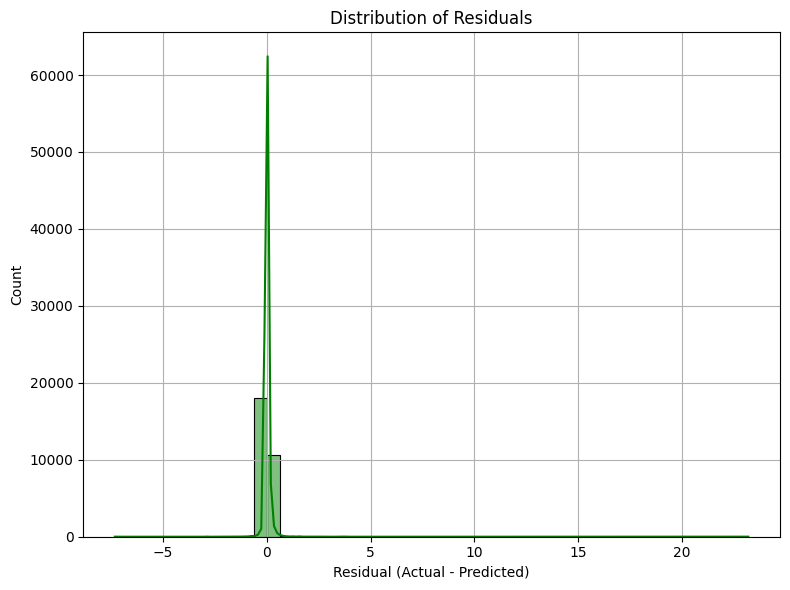

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', bins=50)
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()


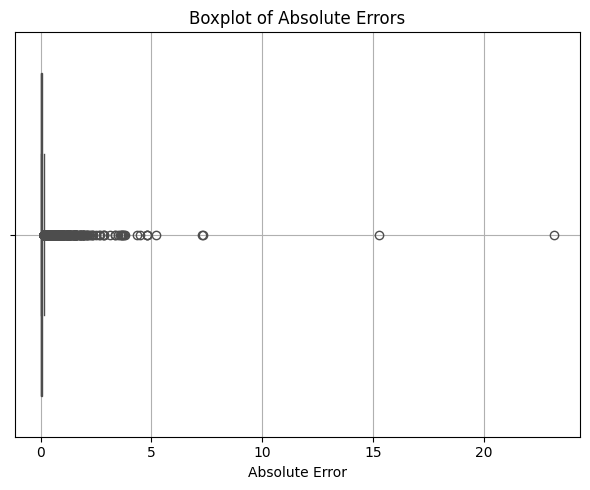

In [15]:
absolute_errors = abs(residuals)

plt.figure(figsize=(6, 5))
sns.boxplot(x=absolute_errors, color='orange')
plt.xlabel("Absolute Error")
plt.title("Boxplot of Absolute Errors")
plt.grid(True)
plt.tight_layout()
plt.show()


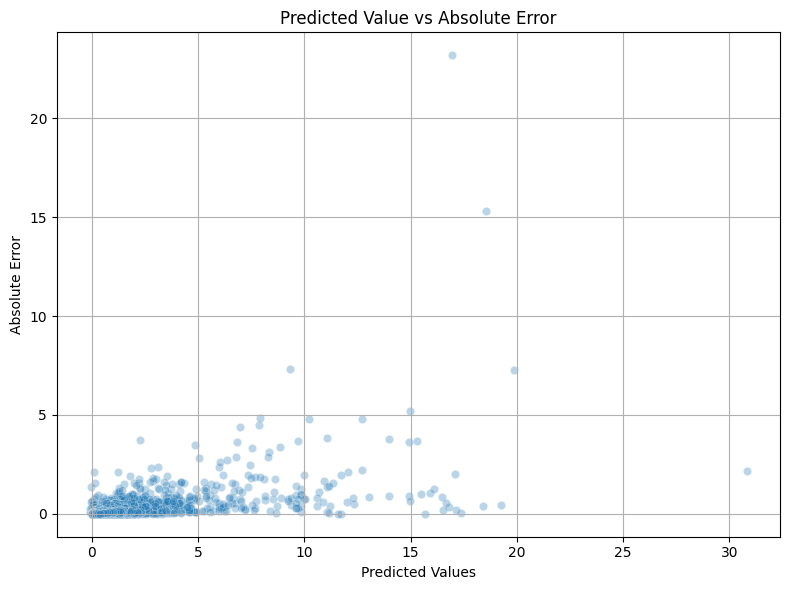

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=absolute_errors, alpha=0.3)
plt.xlabel("Predicted Values")
plt.ylabel("Absolute Error")
plt.title("Predicted Value vs Absolute Error")
plt.grid(True)
plt.tight_layout()
plt.show()
